In [1]:
import pandas as pd

data = pd.read_csv("data/jung.csv")

### 시군구에서 도/광역시만 추출
### 사고일시에서 시만 추출 => 근데 이걸 int로 사용할지 str로 one-hot을 할지 생각해봐야함

In [2]:
data["도광역시"] = data["시군구"].str.split(" ").str.get(0)
#사고일시 column에서 시만 추출
data["사고시"] = data["사고일시"].str.split(" ").str.get(3)
data = data.drop('시군구',  axis=1)
data = data.drop('사고일시', axis=1)
data.head()

,사고번호,요일,사고내용,사망자수,중상자수,경상자수,부상신고자수,사고유형,법규위반,노면상태,...,가해운전자 차종,가해운전자 성별,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,도광역시,사고시
0,2020010200100362,목요일,경상사고,0,0,1,0,차대차 - 측면충돌,교차로운행방법위반,건조,...,자전거,남,70,경상,승용,여,50,상해없음,경상북도,17시
1,2020010800100465,수요일,중상사고,0,1,0,0,차대차 - 측면충돌,안전운전불이행,건조,...,자전거,남,20,중상,승용,여,42,상해없음,경상북도,18시
2,2020011000100216,금요일,경상사고,0,0,1,0,차대차 - 측면충돌,안전운전불이행,건조,...,자전거,남,75,경상,승용,남,81,상해없음,경상북도,11시
3,2020011100100222,토요일,부상신고사고,0,0,0,1,차대차 - 측면충돌,안전운전불이행,건조,...,자전거,남,76,부상신고,승용,남,75,상해없음,경상북도,12시
4,2020011300100133,월요일,경상사고,0,0,1,0,차대차 - 측면충돌,중앙선침범,건조,...,자전거,여,61,경상,화물,남,29,상해없음,경상북도,10시


In [3]:
#혹시몰라 복사본 만들기
data_copy=data.copy()

#사고번호 drop
data_copy = data_copy.drop('사고번호',  axis=1)
data_copy = data_copy.drop('가해운전자 차종',  axis=1)

#시간 int로 바꾸기 -> 이건 위계가 있는 게 아니라 오전 / 오후 / 밤 / 새벽을 나누든 해서 원핫을 해야할 것 같긴 하다..
data_copy['사고시'] = data_copy['사고시'].str.extract('(\d+)').astype(int)
#data_copy.isna().sum()   ->0

#남여 01로 바꾸기
data_copy['가해운전자 성별'] = data_copy['가해운전자 성별'].map({'남':0 , '여':1})
data_copy['피해운전자 성별'] = data_copy['피해운전자 성별'].map({'남':0 , '여':1})
#data_copy['가해운전자 성별'].value_counts()
data_copy.head()

,요일,사고내용,사망자수,중상자수,경상자수,부상신고자수,사고유형,법규위반,노면상태,기상상태,도로형태,가해운전자 성별,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,도광역시,사고시
0,목요일,경상사고,0,0,1,0,차대차 - 측면충돌,교차로운행방법위반,건조,맑음,교차로 - 교차로안,0,70,경상,승용,1,50,상해없음,경상북도,17
1,수요일,중상사고,0,1,0,0,차대차 - 측면충돌,안전운전불이행,건조,맑음,단일로 - 기타,0,20,중상,승용,1,42,상해없음,경상북도,18
2,금요일,경상사고,0,0,1,0,차대차 - 측면충돌,안전운전불이행,건조,맑음,교차로 - 교차로부근,0,75,경상,승용,0,81,상해없음,경상북도,11
3,토요일,부상신고사고,0,0,0,1,차대차 - 측면충돌,안전운전불이행,건조,맑음,교차로 - 교차로안,0,76,부상신고,승용,0,75,상해없음,경상북도,12
4,월요일,경상사고,0,0,1,0,차대차 - 측면충돌,중앙선침범,건조,맑음,교차로 - 교차로안,1,61,경상,화물,0,29,상해없음,경상북도,10


In [4]:
data_copy['가해운전자 상해정도']= data_copy['가해운전자 상해정도'].map({"경상":1,
                                                           "상해없음":0,
                                                           "중상":2,
                                                           "부상신고":1,
                                                           "사망":2,
                                                           "기타불명":0})
data_copy['피해운전자 상해정도']= data_copy['피해운전자 상해정도'].map({"경상":1,
                                                           "상해없음":0,
                                                           "중상":2,
                                                           "부상신고":1,
                                                           "사망":2,
                                                           "기타불명":0})

print(data_copy['가해운전자 상해정도'].value_counts())
print(data_copy['피해운전자 상해정도'].value_counts())
print("=====================================")
print(data_copy['가해운전자 상해정도'].isnull().sum())
print(data_copy['피해운전자 상해정도'].isnull().sum())
#00 Good!

가해운전자 상해정도
1    16098
0     8820
2     5455
Name: count, dtype: int64
피해운전자 상해정도
0    19585
1     7107
2     3681
Name: count, dtype: int64
0
0


In [5]:
print(data_copy['노면상태'].value_counts())
print(data_copy['기상상태'].value_counts())

#기타 ?? 그냥 냅둘까? 논의

노면상태
건조       29011
젖음/습기      990
기타         334
서리/결빙       21
적설          15
침수           2
Name: count, dtype: int64
기상상태
맑음    28735
흐림      729
비       676
기타      196
눈        31
안개        6
Name: count, dtype: int64


In [6]:
data_copy.rename(columns={
    '요일': 'Day',
    '사고내용': 'AccidentType',
    '사망자수': 'Fatalities',
    '중상자수': 'SeriousInjuries',
    '경상자수': 'MinorInjuries',
    '부상신고자수': 'NonFatalInjuries',
    '사고유형': 'AccidentType',
    '법규위반': 'TrafficViolation',
    '노면상태': 'RoadCondition',
    '기상상태': 'WeatherCondition',
    '도로형태': 'RoadType',
    '가해운전자 차종': 'AtFaultDriverVehicleType',
    '가해운전자 성별': 'AtFaultDriverGender',
    '가해운전자 연령': 'AtFaultDriverAge',
    '가해운전자 상해정도': 'AtFaultDriverInjurySeverity',
    '피해운전자 차종': 'VictimVehicleType',
    '피해운전자 성별': 'VictimGender',
    '피해운전자 연령': 'VictimAge',
    '피해운전자 상해정도': 'VictimInjurySeverity',
    '도광역시': 'City',
    '사고시': 'TimeOfAccident'
}, inplace=True)

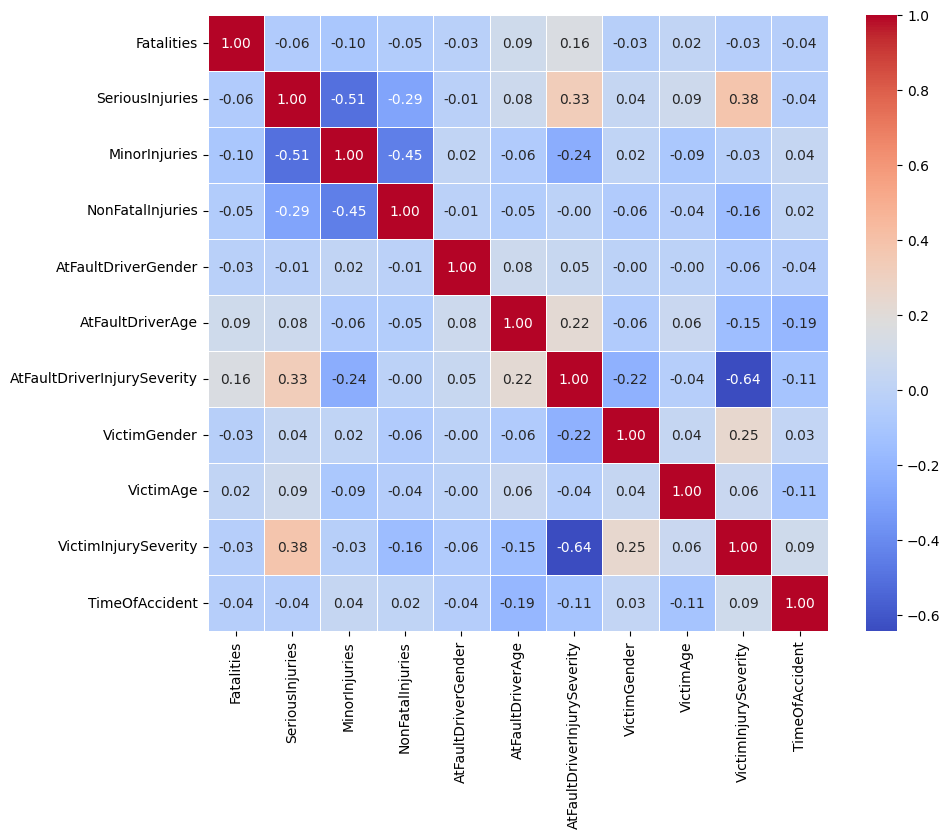

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df
# If it's not already numeric, you may want to convert relevant columns to numeric using pd.to_numeric()

# Select only numeric columns for correlation calculation
numeric_columns = data_copy.select_dtypes(include=['int64']).columns

# Calculate correlation matrix
correlation_matrix = data_copy[numeric_columns].corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a heatmap using Seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Show the plot
plt.show()

만약 시간대를 그룹화를 한다면

In [8]:
bins = [0, 6, 12, 18, 24]
labels = ['dawn', 'morn', 'aftern', 'night']

data_copy['TimeCategory'] = pd.cut(data_copy['TimeOfAccident'], bins=bins, labels=labels, right=False)
data_copy['TimeCategory'].value_counts()
#data_copy['TimeCategory'].isnull().sum() -->0


TimeCategory
aftern    12739
morn       8849
night      7750
dawn       1035
Name: count, dtype: int64

In [9]:
#시간대별 부상정도
value_counts_by_category = data_copy.groupby('TimeCategory')['AtFaultDriverInjurySeverity'].value_counts().unstack().fillna(0)


# Plot a bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x='TimeCategory', y='Count', data=value_counts_by_category, palette='coolwarm')
plt.title('Average AFDIS by TimeCategory')
plt.show()

/tmp/ipykernel_270640/2589043049.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  value_counts_by_category = data_copy.groupby('TimeCategory')['AtFaultDriverInjurySeverity'].value_counts().unstack().fillna(0)


ValueError: Could not interpret value `Count` for `y`. An entry with this name does not appear in `data`.

<Figure size 800x600 with 0 Axes>

# 나이 카테고리화 해보기
결론은 correlation에 차이 없음!

In [ ]:
AgeCat = data_copy.copy()

bins2 = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels2 = [0,1,2,3,4,5,6,7,8,9]
#가해운전자 나이
AgeCat['AtFaultDriverAge'] = pd.cut(AgeCat['AtFaultDriverAge'], bins=bins2, labels=labels2, right=False)

#-->0
#피해운전자 나이
AgeCat['VictimAge'] = pd.cut(AgeCat['VictimAge'], bins=bins2, labels=labels2, right=False)
AgeCat['VictimAge'].value_counts()
#AgeCat['VictimAge'].isnull().sum() 

VictimAge
5    6995
4    5849
6    5595
3    4580
2    3023
7    2280
1     952
0     547
8     521
9      31
Name: count, dtype: int64

In [ ]:
#categorize한게 str이라 int로 바꿈
AgeCat['VictimAge']=AgeCat['VictimAge'].astype(int)
AgeCat['AtFaultDriverAge']=AgeCat['AtFaultDriverAge'].astype(int)
AgeCat.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30373 entries, 0 to 30372
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   Day                          30373 non-null  object  
 1   AccidentType                 30373 non-null  object  
 2   Fatalities                   30373 non-null  int64   
 3   SeriousInjuries              30373 non-null  int64   
 4   MinorInjuries                30373 non-null  int64   
 5   NonFatalInjuries             30373 non-null  int64   
 6   AccidentType                 30373 non-null  object  
 7   TrafficViolation             30373 non-null  object  
 8   RoadCondition                30373 non-null  object  
 9   WeatherCondition             30373 non-null  object  
 10  RoadType                     30373 non-null  object  
 11  AtFaultDriverGender          30373 non-null  int64   
 12  AtFaultDriverAge             30373 non-null  int64   
 13  A

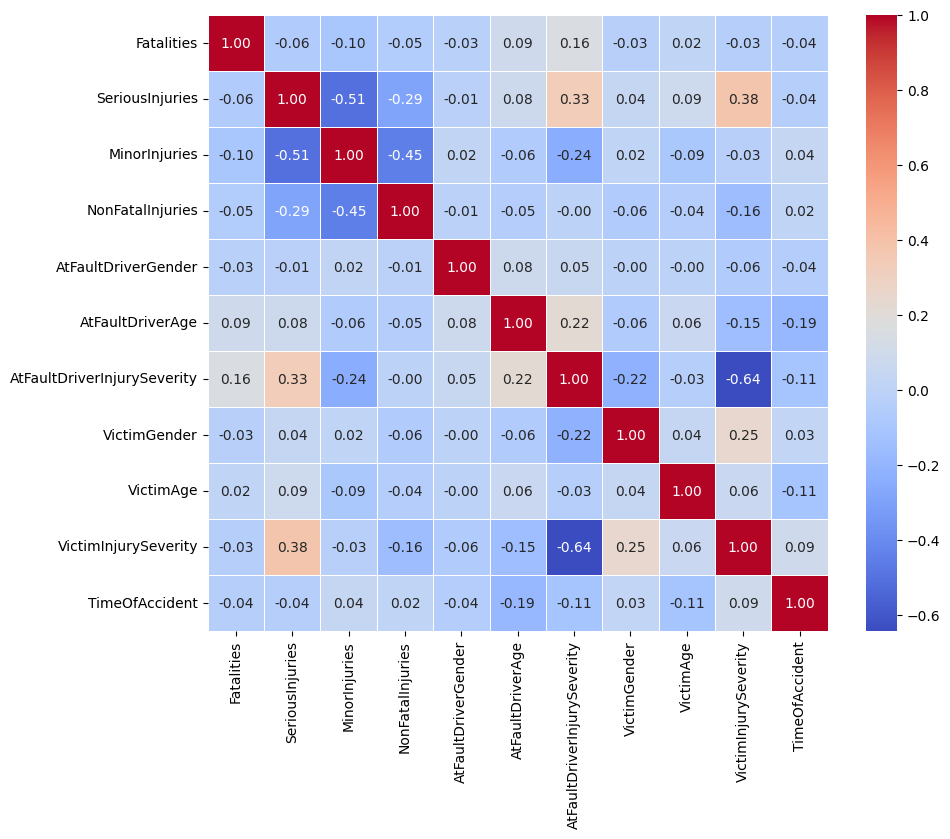

In [ ]:
#categorize 한것으로 다시 heatmap 찍어보기
# Select only numeric columns for correlation calculation
numeric_columns = AgeCat.select_dtypes(include=['int64']).columns

# Calculate correlation matrix
correlation_matrix = AgeCat[numeric_columns].corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a heatmap using Seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Show the plot
plt.show()